# First We Import Some Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
df = pd.read_csv('bike_train.csv')
bike_test = pd.read_csv('bike_test.csv')

# Split Data Into Train and Validation

In [3]:
from sklearn.model_selection import train_test_split
train, validation= train_test_split(df , test_size = 0.3, random_state=0)

# EDA

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8620,2012-08-01 13:00:00,3,0,1,1,32.80,37.120,52,11.0014,59,221,280
8985,2012-08-16 18:00:00,3,0,1,1,32.80,35.605,36,0.0000,109,723,832
6171,2012-02-13 09:00:00,1,0,1,1,4.92,6.820,50,12.9980,7,198,205
6473,2012-03-06 23:00:00,1,0,1,1,11.48,13.635,61,15.0013,3,51,54
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237


In [5]:
#get some information about data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7620 entries, 8620 to 2732
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    7620 non-null   object 
 1   season      7620 non-null   int64  
 2   holiday     7620 non-null   int64  
 3   workingday  7620 non-null   int64  
 4   weather     7620 non-null   int64  
 5   temp        7620 non-null   float64
 6   atemp       7620 non-null   float64
 7   humidity    7620 non-null   int64  
 8   windspeed   7620 non-null   float64
 9   casual      7620 non-null   int64  
 10  registered  7620 non-null   int64  
 11  count       7620 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 773.9+ KB


In [6]:
#get some information about numerical columns
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000
mean,2.499475,0.029134,0.681627,1.413648,20.158010,23.573031,61.908268,12.770095,35.674016,154.675853,190.349869
std,1.116933,0.168193,0.465876,0.631270,7.774826,8.457059,19.266797,8.237830,49.751265,151.663417,181.530697
min,1.000000,0.000000,0.000000,1.000000,0.820000,2.275000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2.500000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,11.001400,16.000000,116.000000,141.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,48.000000,222.000000,283.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: xlabel='count', ylabel='Count'>

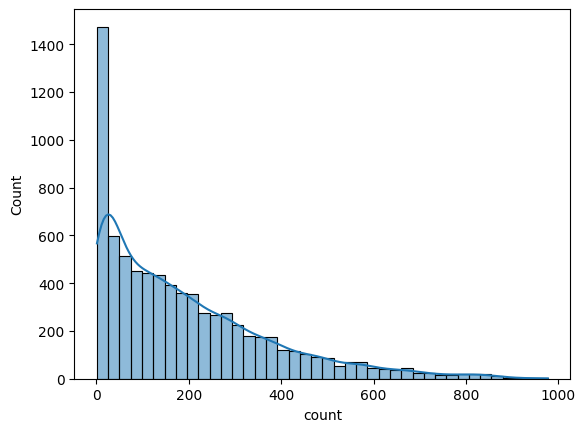

In [7]:
#check For The target column i found that it is right seqweed so i try to use log and it transform nearly to normal
sns.histplot( train['count'] , kde = True)

<Axes: xlabel='count', ylabel='Count'>

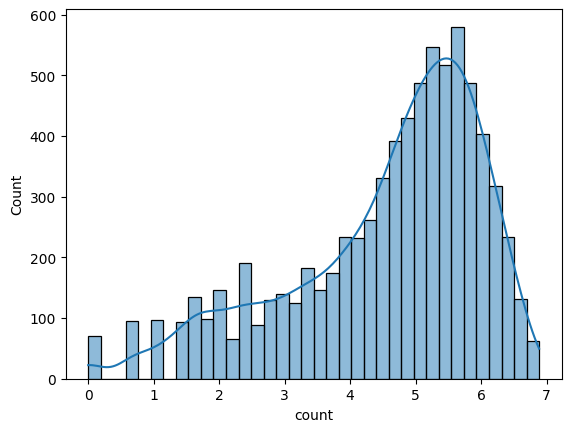

In [8]:
#try log transformation on target column
sns.histplot( np.log(train['count']) , kde = True)

C:\Users\Ghamrawy\AppData\Local\Temp\ipykernel_28212\1538184056.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , annot=True)


<Axes: >

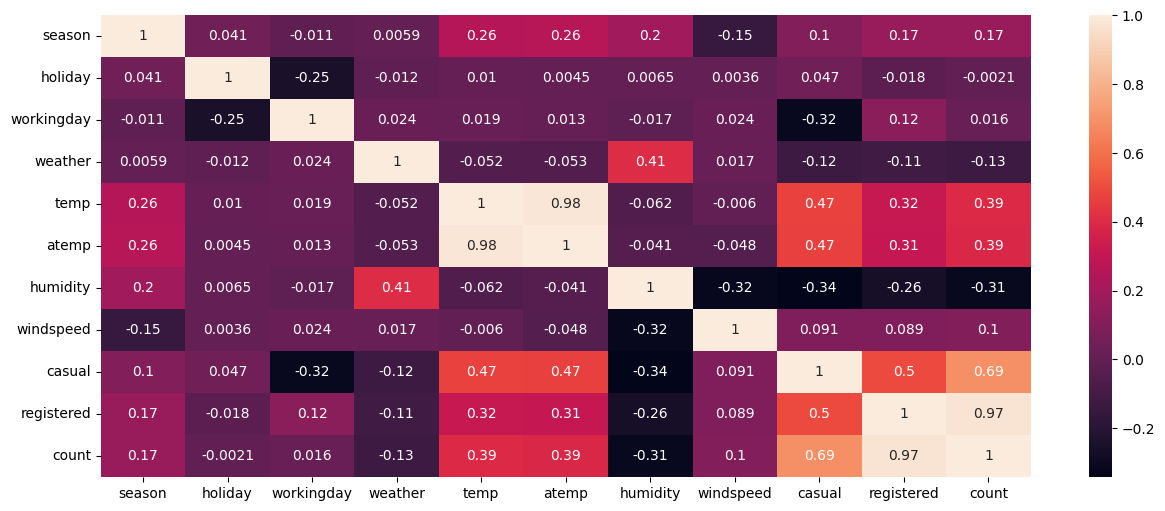

In [9]:
#check for correlation
fig = plt.figure(figsize = (15,6))
sns.heatmap(train.corr() , annot=True)

<Axes: xlabel='season', ylabel='count'>

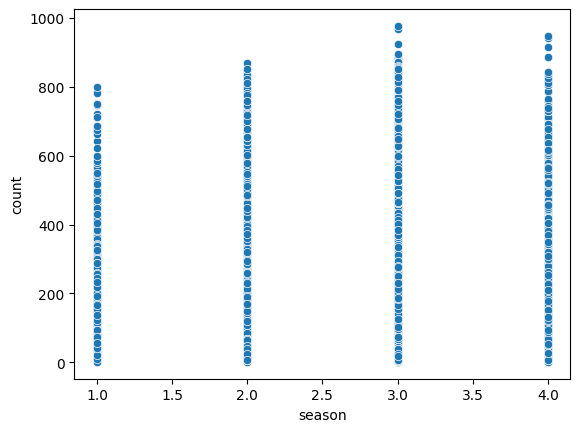

In [10]:

sns.scatterplot(data = train , x='season' , y ='count' )

<Axes: xlabel='season', ylabel='count'>

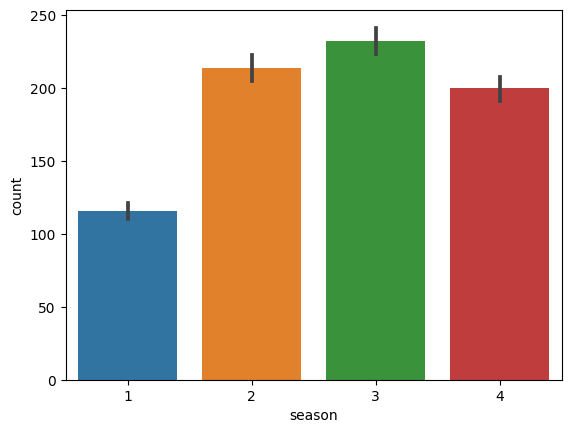

In [11]:
#check relation between season and bike rent count
sns.barplot(data = train , x='season' , y ='count' )

In [12]:
#rename count column to use it in some operation as aggregation functions
train.rename(columns = {'count':'rent_count'},inplace = True)
validation.rename(columns = {'count':'rent_count'},inplace = True)
bike_test.rename(columns = {'count':'rent_count'},inplace = True)

In [13]:
#i check for any outliers that i can found and i did not see any outlier
train.groupby('season').rent_count.agg([len,min,max])

,len,min,max
season,,,
1,1902,1,801
2,1908,1,868
3,1912,1,977
4,1898,1,948


<Axes: xlabel='holiday', ylabel='rent_count'>

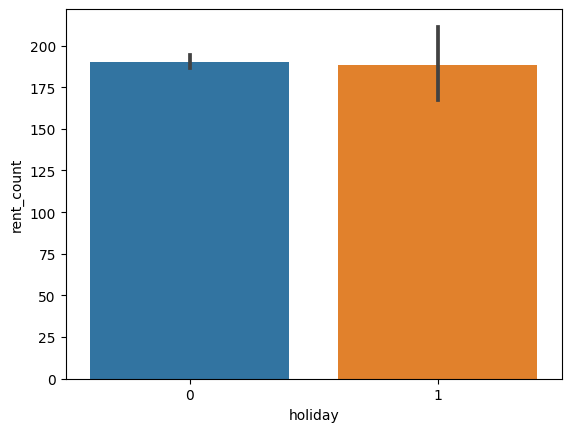

In [14]:
#check relation between count and holiday days
sns.barplot(data = train , x='holiday' , y ='rent_count' )

In [15]:
# check if there is any outlier
train.groupby('holiday').rent_count.agg([len,min,max])

,len,min,max
holiday,,,
0,7398,1,977
1,222,2,712


<Axes: xlabel='workingday', ylabel='rent_count'>

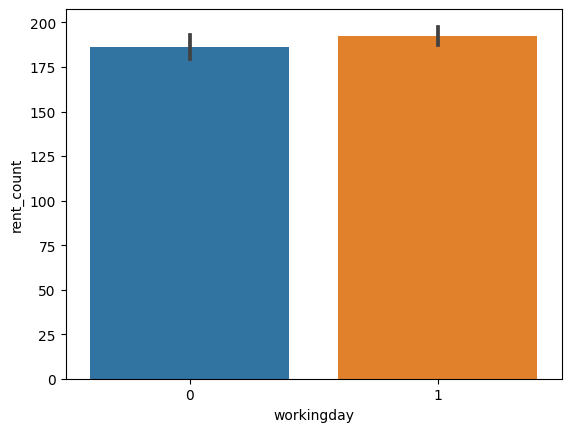

In [16]:
sns.barplot(data = train , x='workingday' , y ='rent_count' )

<Axes: xlabel='weather', ylabel='rent_count'>

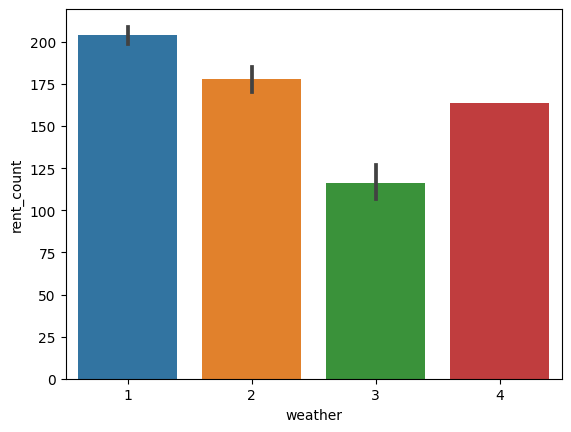

In [17]:
sns.barplot(data = train , x='weather' , y ='rent_count' )

In [18]:
train.groupby('weather').rent_count.agg([len,min,max])

,len,min,max
weather,,,
1,5061,1,977
2,1967,1,868
3,591,1,819
4,1,164,164


In [19]:
train[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rent_count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


<Axes: xlabel='temp', ylabel='rent_count'>

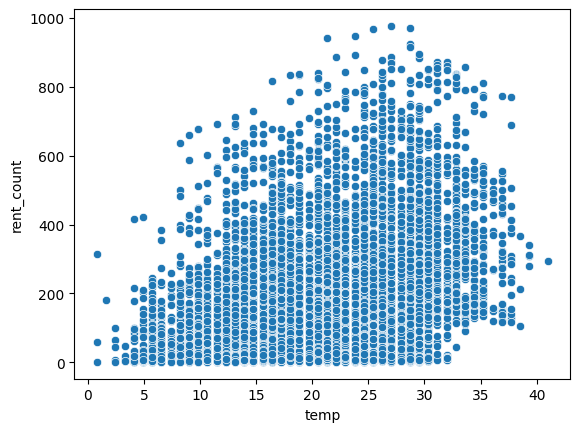

In [20]:
sns.scatterplot(data = train , x='temp' , y ='rent_count' )

<Axes: xlabel='humidity', ylabel='rent_count'>

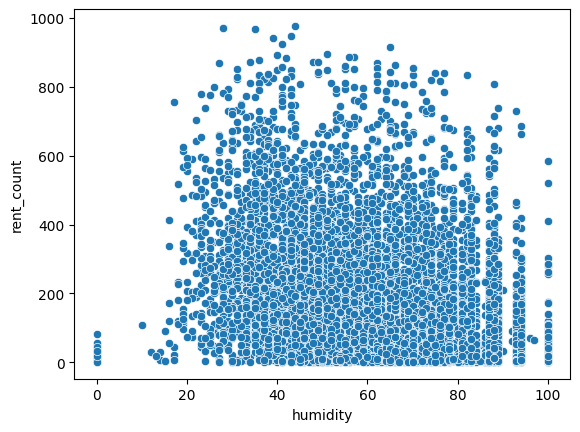

In [21]:
sns.scatterplot(data = train , x='humidity' , y ='rent_count' )

In [22]:
train.groupby('humidity').rent_count.agg([len,min,max]).tail(50)

,len,min,max
humidity,,,
47,89,1,572
48,83,2,872
49,181,1,872
50,125,2,685
51,112,1,894
52,153,1,812
53,122,2,794
54,125,1,743
55,150,1,862


In [23]:
train.groupby('humidity').rent_count.agg([len,min,max]).head(50)

,len,min,max
humidity,,,
0,12,1,82
10,1,107,107
12,1,29,29
13,1,17,17
14,2,7,31
15,3,3,90
16,5,55,413
17,4,6,757
18,6,112,517


<Axes: xlabel='windspeed', ylabel='rent_count'>

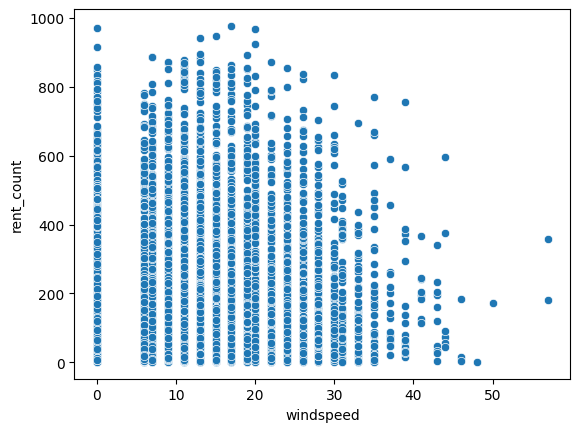

In [24]:
sns.scatterplot(data = train , x='windspeed' , y ='rent_count' )

In [25]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
rent_count    0
dtype: int64

In [26]:
train['Dates'] = pd.to_datetime(train['datetime']).dt.date
train['Time'] = pd.to_datetime(train['datetime']).dt.time
validation['Dates'] = pd.to_datetime(validation['datetime']).dt.date
validation['Time'] = pd.to_datetime(validation['datetime']).dt.time
bike_test['Dates'] = pd.to_datetime(bike_test['datetime']).dt.date
bike_test['Time'] = pd.to_datetime(bike_test['datetime']).dt.time

In [27]:
train['Dates'] = pd.to_datetime(train['Dates'] , format = '%Y-%m-%d')
validation['Dates'] = pd.to_datetime(validation['Dates'] , format = '%Y-%m-%d')
bike_test['Dates'] = pd.to_datetime(bike_test['Dates'] , format = '%Y-%m-%d')

In [28]:
train['day'] = train['Dates'].dt.day
train['month'] = train['Dates'].dt.month
train['year'] = train['Dates'].dt.year
validation['day'] = validation['Dates'].dt.day
validation['month'] = validation['Dates'].dt.month
validation['year'] = validation['Dates'].dt.year
bike_test['day'] = bike_test['Dates'].dt.day
bike_test['month'] = bike_test['Dates'].dt.month
bike_test['year'] = bike_test['Dates'].dt.year

In [29]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rent_count,Dates,Time,day,month,year
4859,2011-11-15 13:00:00,4,0,1,3,22.14,25.760,60,15.0013,21,132,153,2011-11-15,13:00:00,15,11,2011
3264,2011-08-05 22:00:00,3,0,1,1,28.70,32.575,65,15.0013,51,137,188,2011-08-05,22:00:00,5,8,2011
9845,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,249,368,617,2012-10-14,14:00:00,14,10,2012
10799,2012-12-16 09:00:00,4,0,0,2,14.76,17.425,87,8.9981,19,113,132,2012-12-16,09:00:00,16,12,2012
2732,2011-07-02 18:00:00,3,0,0,1,33.62,35.605,30,19.0012,193,190,383,2011-07-02,18:00:00,2,7,2011


In [30]:
train['Time'] = pd.to_datetime(train['Time'] , format = '%H:%M:%S')
validation['Time'] = pd.to_datetime(validation['Time'] , format = '%H:%M:%S')
bike_test['Time'] = pd.to_datetime(bike_test['Time'] , format = '%H:%M:%S')

In [31]:
train['hour'] = train['Time'].apply(lambda x: x.hour)
validation['hour'] = validation['Time'].apply(lambda x: x.hour)
bike_test['hour'] = bike_test['Time'].apply(lambda x: x.hour)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7620 entries, 8620 to 2732
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    7620 non-null   object        
 1   season      7620 non-null   int64         
 2   holiday     7620 non-null   int64         
 3   workingday  7620 non-null   int64         
 4   weather     7620 non-null   int64         
 5   temp        7620 non-null   float64       
 6   atemp       7620 non-null   float64       
 7   humidity    7620 non-null   int64         
 8   windspeed   7620 non-null   float64       
 9   casual      7620 non-null   int64         
 10  registered  7620 non-null   int64         
 11  rent_count  7620 non-null   int64         
 12  Dates       7620 non-null   datetime64[ns]
 13  Time        7620 non-null   datetime64[ns]
 14  day         7620 non-null   int64         
 15  month       7620 non-null   int64         
 16  year        7620 non-

<Axes: xlabel='hour', ylabel='rent_count'>

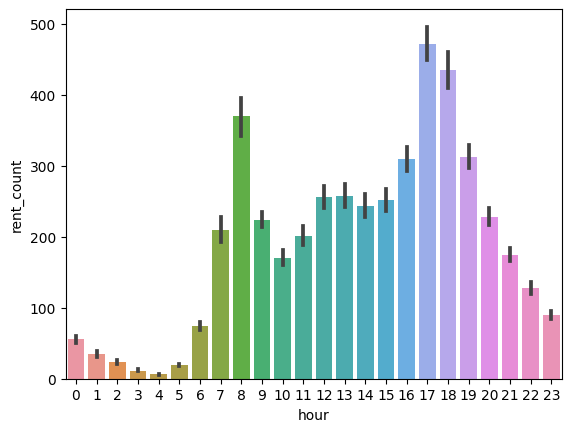

In [33]:
sns.barplot(data = train , x='hour' , y ='rent_count' )

In [34]:
train.groupby('hour').rent_count.agg([len,min,max])

,len,min,max
hour,,,
0,324,3,283
1,323,1,168
2,317,1,119
3,303,1,66
4,308,1,26
5,315,1,57
6,327,1,213
7,312,1,596
8,303,8,839


<Axes: xlabel='year', ylabel='rent_count'>

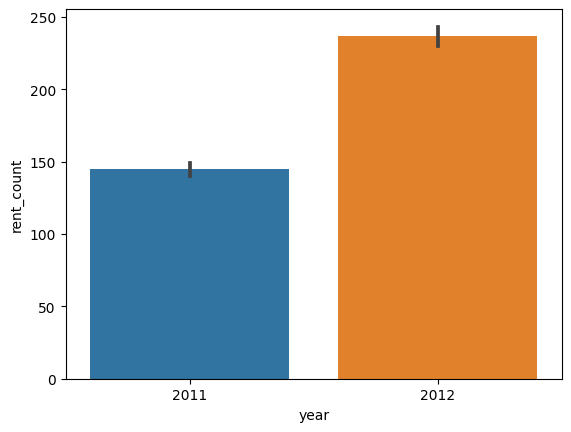

In [35]:
sns.barplot(data = train , x='year' , y ='rent_count' )

<Axes: xlabel='month', ylabel='rent_count'>

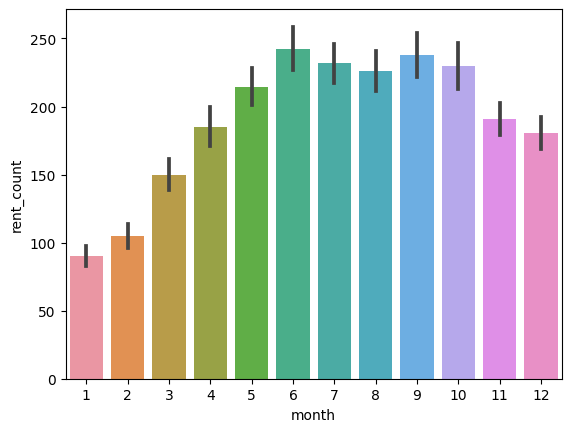

In [36]:
sns.barplot(data = train , x='month' , y ='rent_count' )

In [37]:
train.groupby('month').rent_count.agg([len,min,max])

,len,min,max
month,,,
1,617,1,499
2,634,1,539
3,651,1,801
4,640,1,822
5,647,1,868
6,621,2,850
7,635,1,872
8,645,1,868
9,632,1,977


<Axes: xlabel='day', ylabel='rent_count'>

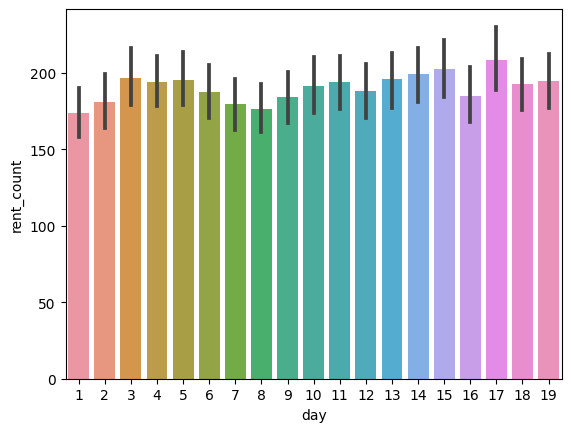

In [38]:
sns.barplot(data = train , x='day' , y ='rent_count' )

In [39]:
train.groupby('day').rent_count.agg([len,min,max])

,len,min,max
day,,,
1,405,1,837
2,404,1,747
3,402,1,917
4,415,1,887
5,409,1,863
6,391,1,858
7,387,1,868
8,408,1,862
9,382,1,872


C:\Users\Ghamrawy\AppData\Local\Temp\ipykernel_28212\2117883811.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , annot = True)


<Axes: >

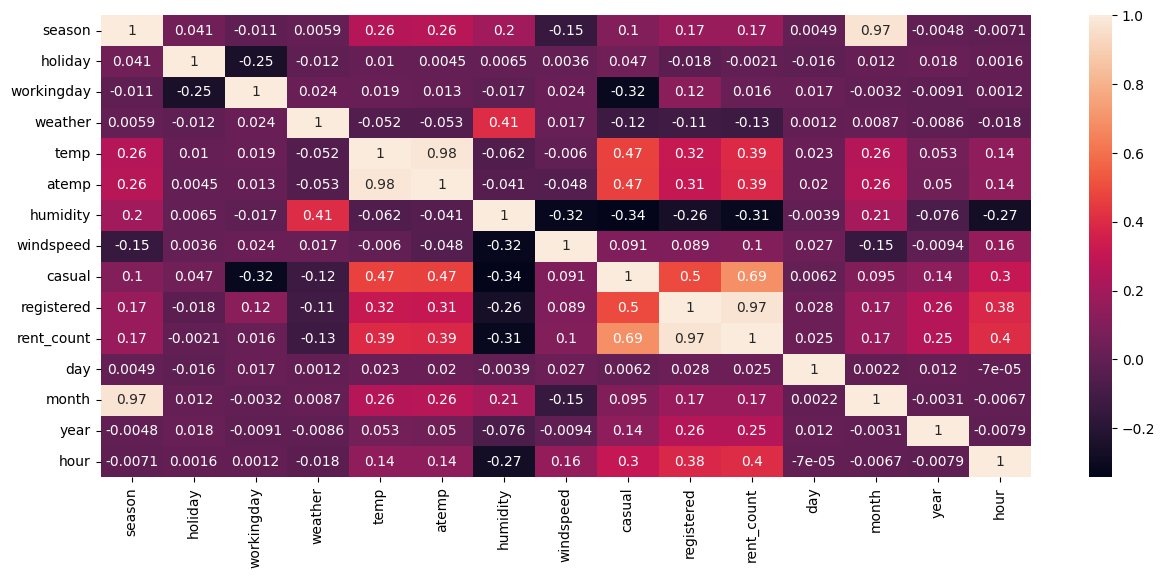

In [40]:
fig = plt.figure(figsize = (15,6))
sns.heatmap(train.corr() , annot = True)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7620 entries, 8620 to 2732
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    7620 non-null   object        
 1   season      7620 non-null   int64         
 2   holiday     7620 non-null   int64         
 3   workingday  7620 non-null   int64         
 4   weather     7620 non-null   int64         
 5   temp        7620 non-null   float64       
 6   atemp       7620 non-null   float64       
 7   humidity    7620 non-null   int64         
 8   windspeed   7620 non-null   float64       
 9   casual      7620 non-null   int64         
 10  registered  7620 non-null   int64         
 11  rent_count  7620 non-null   int64         
 12  Dates       7620 non-null   datetime64[ns]
 13  Time        7620 non-null   datetime64[ns]
 14  day         7620 non-null   int64         
 15  month       7620 non-null   int64         
 16  year        7620 non-

In [42]:
#remove casual , registered , datetime , Dates,time,atemp
train.drop(columns = ['datetime' , 'casual' ,'registered' , 'Dates' , 'Time','atemp' ] ,axis =1, inplace = True)
validation.drop(columns = ['datetime' , 'casual' ,'registered' , 'Dates' , 'Time','atemp' ] , axis=1 , inplace = True)
bike_test.drop(columns = ['datetime' , 'Dates' , 'Time','atemp' ] , axis=1 , inplace = True)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7620 entries, 8620 to 2732
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      7620 non-null   int64  
 1   holiday     7620 non-null   int64  
 2   workingday  7620 non-null   int64  
 3   weather     7620 non-null   int64  
 4   temp        7620 non-null   float64
 5   humidity    7620 non-null   int64  
 6   windspeed   7620 non-null   float64
 7   rent_count  7620 non-null   int64  
 8   day         7620 non-null   int64  
 9   month       7620 non-null   int64  
 10  year        7620 non-null   int64  
 11  hour        7620 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 773.9 KB


In [44]:
train['weather'] = np.where(train['weather'] > 3 , 3 ,train['weather'])
validation['weather'] = np.where(validation['weather'] >3 , 3 ,validation['weather'])
bike_test['weather'] = np.where(bike_test['weather'] >3 , 3 ,bike_test['weather'])

In [45]:
train['humidity'] = np.where(train['humidity'] == 10  , 20 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 11  , 20 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 12  , 20 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 13  , 20 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 14  , 20 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 15  , 20 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 16  , 20 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 17  , 20 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 18  , 20 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 19  , 20 ,train['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 10  , 20 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 11  , 20 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 12  , 20 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 13  , 20 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 14  , 20 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 15  , 20 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 16  , 20 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 17  , 20 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 18  , 20 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 19  , 20 ,validation['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 10  , 20 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 11  , 20 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 12  , 20 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 13  , 20 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 14  , 20 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 15  , 20 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 16  , 20 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 17  , 20 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 18  , 20 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 19  , 20 ,bike_test['humidity'])

In [46]:
train['humidity'] = np.where(train['humidity'] == 21  , 23 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 22  , 23 ,train['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 21  , 23 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 22  , 23 ,validation['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 21  , 23 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 22  , 23 ,bike_test['humidity'])

In [47]:
train['humidity'] = np.where(train['humidity'] == 24  , 27 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 25  , 27 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 26  , 27 ,train['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 24  , 27 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 25  , 27 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 26  , 27 ,validation['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 24  , 27 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 25  , 27 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 26  , 27 ,bike_test['humidity'])

In [48]:
train['humidity'] = np.where(train['humidity'] == 85  , 87 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 86  , 87 ,train['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 85  , 87 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 86  , 87 ,validation['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 85  , 87 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 86  , 87 ,bike_test['humidity'])

In [49]:
train['humidity'] = np.where(train['humidity'] == 90  , 93 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 91  , 93 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 92  , 93 ,train['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 90  , 93 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 91  , 93 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 92  , 93 ,validation['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 90  , 93 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 91  , 93 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 92  , 93 ,bike_test['humidity'])

In [50]:
train['humidity'] = np.where(train['humidity'] == 96  , 100 ,train['humidity'])
train['humidity'] = np.where(train['humidity'] == 97  , 100 ,train['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 96  , 100 ,validation['humidity'])
validation['humidity'] = np.where(validation['humidity'] == 97  , 100 ,validation['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 96  , 100 ,bike_test['humidity'])
bike_test['humidity'] = np.where(bike_test['humidity'] == 97  , 100 ,bike_test['humidity'])

<Axes: xlabel='humidity', ylabel='rent_count'>

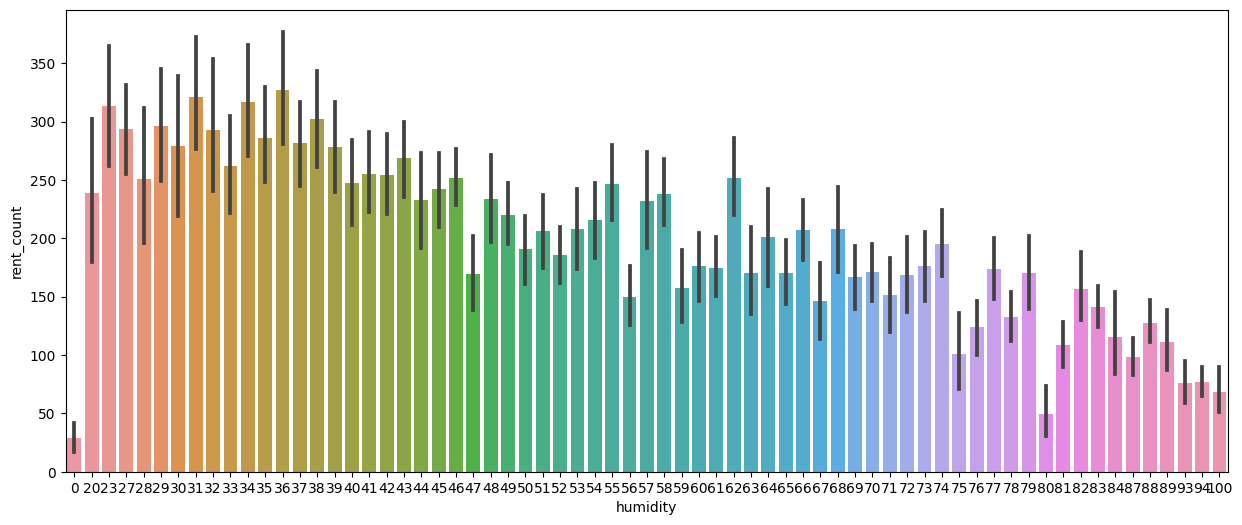

In [51]:
fig = plt.figure(figsize = (15,6))
sns.barplot(data = train , x='humidity' , y ='rent_count' )

In [52]:
#target transformation
train['rent_count'] = train['rent_count'].apply(lambda x: np.log(x))
validation['rent_count'] = validation['rent_count'].apply(lambda x: np.log(x))

In [53]:
year_dict = {2011: 1 , 2012 : 0}
train['year'] = train['year'].replace(year_dict) 
validation['year'] = validation['year'].replace(year_dict) 
bike_test['year'] = bike_test['year'].replace(year_dict) 

In [54]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,rent_count,day,month,year,hour
8620,3,0,1,1,32.80,52,11.0014,5.634790,1,8,0,13
8985,3,0,1,1,32.80,36,0.0000,6.723832,16,8,0,18
6171,1,0,1,1,4.92,50,12.9980,5.323010,13,2,0,9
6473,1,0,1,1,11.48,61,15.0013,3.988984,6,3,0,23
10877,4,0,1,1,17.22,50,19.0012,5.468060,19,12,0,15


In [55]:
train = pd.get_dummies(train,columns=['season'],prefix=['season'])
validation = pd.get_dummies(validation,columns=['season'],prefix=['season'])
bike_test = pd.get_dummies(bike_test,columns=['season'],prefix=['season'])
train = pd.get_dummies(train,columns=['month'],prefix=['month'])
validation = pd.get_dummies(validation,columns=['month'],prefix=['month'])
bike_test = pd.get_dummies(bike_test,columns=['month'],prefix=['month'])
train = pd.get_dummies(train,columns=['hour'],prefix=['hour'])
validation = pd.get_dummies(validation,columns=['hour'],prefix=['hour'])
bike_test = pd.get_dummies(bike_test,columns=['hour'],prefix=['hour'])

In [56]:
train.head()

,holiday,workingday,weather,temp,humidity,windspeed,rent_count,day,year,season_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
8620,0,1,1,32.80,52,11.0014,5.634790,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8985,0,1,1,32.80,36,0.0000,6.723832,16,0,0,...,0,0,0,0,1,0,0,0,0,0
6171,0,1,1,4.92,50,12.9980,5.323010,13,0,1,...,0,0,0,0,0,0,0,0,0,0
6473,0,1,1,11.48,61,15.0013,3.988984,6,0,1,...,0,0,0,0,0,0,0,0,0,1
10877,0,1,1,17.22,50,19.0012,5.468060,19,0,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
#Linear Regression
x= train.drop(["rent_count"],axis =1) # independent Valiables 
y = train[["rent_count"]] # output
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(x,y,test_size = 0.3 , random_state = 0)
from sklearn.linear_model  import LinearRegression , Lasso, Ridge
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)
train_preds = mlrm.predict(train_X)
vali_preds = mlrm.predict(val_X)
mlrm.score(train_X,train_y)*100

82.6348948977048

In [58]:
mlrm.score(val_X,val_y)*100

82.5572583406492

In [59]:
# mean_squared_log_error(y.iloc[ :6493],count_exp_predict)
train_msle = mean_squared_log_error(train_y, train_preds)
vali_msle = mean_squared_log_error(val_y, vali_preds)
print(train_msle)
print(vali_msle)

0.02848419503284689
0.028208811659001815


In [60]:
count_predict = mlrm.predict(bike_test)
count_predict

array([[2.74079895e+00],
       [2.21886444e+00],
       [1.63753510e+00],
       ...,
       [1.28214439e+11],
       [1.28214439e+11],
       [1.28214439e+11]])

In [61]:
count_exp_predict = np.exp(count_predict)
print(count_exp_predict)

[[15.49936337]
 [ 9.19688133]
 [ 5.14247816]
 ...
 [        inf]
 [        inf]
 [        inf]]


C:\Users\Ghamrawy\AppData\Local\Temp\ipykernel_28212\3979683601.py:1: RuntimeWarning: overflow encountered in exp
  count_exp_predict = np.exp(count_predict)


In [62]:
#Decision Tree 
from sklearn.tree import DecisionTreeRegressor

x= train.drop(["rent_count"],axis =1) # independent Valiables 
y1 = train[["rent_count"]] # output
train_X,val_X,train_y,val_y = train_test_split(x,y1,test_size = 0.3 , random_state = 0)
model = DecisionTreeRegressor(random_state=0, max_depth=10)
model.fit(train_X,train_y)
train2_preds = model.predict(train_X)
vali2_preds = model.predict(val_X)
model.score(train_X,train_y)*100

84.76072682360453

In [63]:
train2_msle = mean_squared_log_error(train_y, train2_preds)
vali2_msle = mean_squared_log_error(val_y, vali2_preds)
print(train2_msle)
print(vali2_msle)

0.012554838425306834
0.031416026873454676


In [64]:
model.score(val_X,val_y)*100

80.25802381846127

In [65]:
count_predict2 = model.predict(bike_test)
count_predict2

array([2.17617792, 1.69654435, 1.79175947, ..., 4.83919781, 4.83919781,
       4.83919781])

In [66]:
exp_count_predict2 = np.exp(count_predict2)
exp_count_predict2

array([  8.81255951,   5.45506397,   6.        , ..., 126.36794027,
       126.36794027, 126.36794027])

In [67]:
mean_squared_log_error(y1.iloc[ :6493],exp_count_predict2)

10.17856022493034

In [68]:
x= train.drop(["rent_count"],axis =1) # independent Valiables 
y = train[["rent_count"]] # output
train_X,val_X,train_y,val_y = train_test_split(x,y,test_size = 0.3 , random_state = 0)
model4 = Ridge()
model4.fit(train_X,train_y)
train3_preds = model4.predict(train_X)
vali3_preds = model4.predict(val_X)
model4.score(train_X,train_y)*100

82.6329428015069

In [69]:
model4.score(val_X,val_y)*100

82.55264637933544

In [70]:
train3_msle = mean_squared_log_error(train_y, train3_preds)
vali3_msle = mean_squared_log_error(val_y, vali3_preds)
print(train3_msle)
print(vali3_msle)

0.028558120714699063
0.028273052481029244


In [71]:
count_predict3 = model4.predict(bike_test)
count_predict3

array([[2.74874455],
       [2.2280083 ],
       [1.6503515 ],
       ...,
       [4.81776101],
       [4.58217745],
       [4.15972544]])

In [72]:
exp_count_predict3 = np.exp(count_predict3)
exp_count_predict3

array([[ 15.62300561],
       [  9.28136195],
       [  5.2088104 ],
       ...,
       [123.68784418],
       [ 97.72695837],
       [ 64.05393325]])

In [73]:
x= train.drop(["rent_count"],axis =1) # independent Valiables 
y = train[["rent_count"]] # output
train_X,val_X,train_y,val_y = train_test_split(x,y,test_size = 0.3 , random_state = 0)
model5 = Lasso()
model5.fit(train_X,train_y)
train4_preds = model5.predict(train_X)
vali4_preds = model5.predict(val_X)
model5.score(train_X,train_y)*100

21.404885078524295

In [74]:
model5.score(val_X,val_y)*100

23.236732937003158

In [75]:
train4_msle = mean_squared_log_error(train_y, train4_preds)
vali4_msle = mean_squared_log_error(val_y, vali4_preds)
print(train4_msle)
print(vali4_msle)

0.10646009409469492
0.10933303930156131


In [76]:
count_predict4 = model5.predict(bike_test)
count_predict4

array([4.18843053, 4.18843053, 4.18843053, ..., 4.10628385, 4.18843053,
       4.00360051])

In [77]:
exp_count_predict4 = np.exp(count_predict4)
exp_count_predict4

array([65.91925133, 65.91925133, 65.91925133, ..., 60.72065091,
       65.91925133, 54.79508546])

# From The Above Models I found that the Linear Regression Model is the best one in this case